<a href="https://colab.research.google.com/github/ohjisu320/study_data_analytics/blob/main/docs/visualization/visualization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비과정

## 한글 폰트 설치
- !apt-get install -y fonts-nanum
- !fc-cache -fv
- !rm ~/.cache/matplotlib -rf

<!-- 설치 후 colab ruddn runtime > restart session 필요 -->

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,102 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

## matplotlib 시각화

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## load dataset file

In [6]:
import pandas as pd
df_SSL = pd.read_csv('SpineSurgeryList.csv')
df_SSL[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [44]:
import seaborn as sns

# 분석

### 분석 방식
- 목적 : 병원 회전율 높이는 방법
- 방법 : 입원/퇴원 간 추이

In [7]:
# 확인 대상 컬럼
df_SSL.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [11]:
df_SSL['환자ID'].value_counts()[:5] # unique한 value인지 확인하는 방법

1PT       1
1259PT    1
1271PT    1
1270PT    1
1269PT    1
Name: 환자ID, dtype: int64

In [12]:
df_SSL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 필요 컬럼들만 추출

In [27]:
# df_SSL[['환자ID', '입원일자', '퇴원일자']].info() # 추출한 컬럼들만 정보 확인
df_SSL_extracts = df_SSL[['환자ID', '입원일자', '퇴원일자']] # 추출한 컬럼들만 정보 확인

### 분석을 위한 전처리

In [28]:
df_SSL_extracts['입원일자'] # int로 나오는 것들은 변환 시 string으로 바꿔야 함.

0       20190713
1       20190715
2       20190729
3       20190731
4       20190903
          ...   
1889    20170407
1890    20170426
1891    20170410
1892    20170408
1893    20170412
Name: 입원일자, Length: 1894, dtype: int64

In [32]:
df_SSL_extracts['입원일자_datetime'] = pd.to_datetime(df_SSL_extracts['입원일자'].astype(str)) # string으로 바꾸는 법 = astype(str)
df_SSL_extracts['퇴원일자_datetime'] = pd.to_datetime(df_SSL_extracts['퇴원일자'].astype(str)) # string으로 바꾸는 법 = astype(str)


<ipython-input-32-d9bd0711573d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_datetime'] = pd.to_datetime(df_SSL_extracts['입원일자'].astype(str)) # string으로 바꾸는 법 = astype(str)
<ipython-input-32-d9bd0711573d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['퇴원일자_datetime'] = pd.to_datetime(df_SSL_extracts['퇴원일자'].astype(str)) # string으로 바꾸는 법 = astype(str)


In [34]:
df_SSL_extracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   환자ID           1894 non-null   object        
 1   입원일자           1894 non-null   int64         
 2   퇴원일자           1894 non-null   int64         
 3   입원일자_datetime  1894 non-null   datetime64[ns]
 4   퇴원일자_datetime  1894 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 74.1+ KB


### 주차별 환자 입원/퇴원 추이 시각화와 분석

In [75]:
df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week
df_SSL_extracts['퇴원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week

<ipython-input-75-0fc9ff1ad7df>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week
<ipython-input-75-0fc9ff1ad7df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week
<ipython-input-75-0fc9ff1ad7df>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_SSL_extracts['퇴원일자_week'] = df_SSL_extracts['입원일자_datetime'].dt.week
<ipython-input-75-0fc9ff1ad7df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [78]:
df_SSL_extracts_in_week = pd.pivot_table(data= df_SSL_extracts[['입원일자_week', '환자ID']], index='입원일자_week', aggfunc=len)
df_SSL_extracts_in_week['입원일자_week']=df_SSL_extracts_in_week.index
df_SSL_extracts_out_week = pd.pivot_table(data= df_SSL_extracts[['퇴원일자_week', '환자ID']], index='퇴원일자_week', aggfunc=len)
df_SSL_extracts_out_week['퇴원일자_week']=df_SSL_extracts_out_week.index

In [79]:
df_SSL_extracts_in_week[:5]

,환자ID,입원일자_week
입원일자_week,,
1,88,1
2,53,2
3,56,3
4,43,4
5,75,5


<Axes: xlabel='입원일자_week', ylabel='환자ID'>

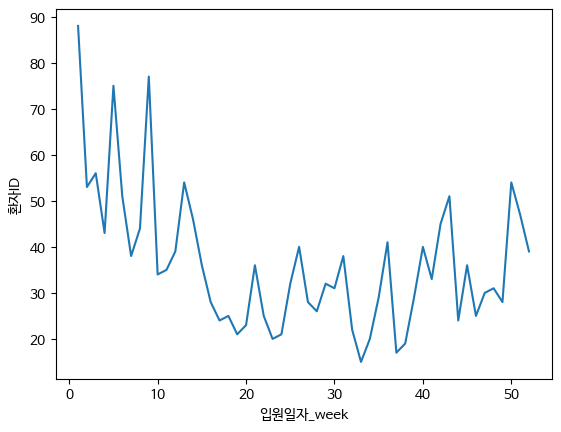

In [81]:
sns.lineplot(data=df_SSL_extracts_in_week, x='입원일자_week', y='환자ID')

<Axes: xlabel='퇴원일자_week', ylabel='환자ID'>

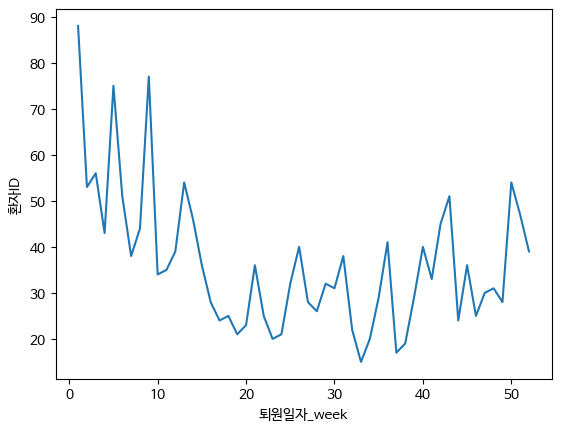

In [82]:
sns.lineplot(data=df_SSL_extracts_out_week, x='퇴원일자_week', y='환자ID')

### 요일별 환자 입원/퇴원 추이 시각화와 분석

In [67]:
df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_datetime'].dt.day_name()
df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_datetime'].dt.day_name()
df_SSL_extracts[:5]

<ipython-input-67-61c61447de3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['입원일자_day_name'] = df_SSL_extracts['입원일자_datetime'].dt.day_name()
<ipython-input-67-61c61447de3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SSL_extracts['퇴원일자_day_name'] = df_SSL_extracts['퇴원일자_datetime'].dt.day_name()


,환자ID,입원일자,퇴원일자,입원일자_datetime,퇴원일자_datetime,입원일자_day_name,퇴원일자_day_name
0,1PT,20190713,20190716,2019-07-13,2019-07-16,Saturday,Tuesday
1,2PT,20190715,20190716,2019-07-15,2019-07-16,Monday,Tuesday
2,3PT,20190729,20190801,2019-07-29,2019-08-01,Monday,Thursday
3,4PT,20190731,20190803,2019-07-31,2019-08-03,Wednesday,Saturday
4,5PT,20190903,20190907,2019-09-03,2019-09-07,Tuesday,Saturday


In [68]:
df_SSL_extracts_in_pivot = pd.pivot_table(data= df_SSL_extracts[['입원일자_day_name', '환자ID']], index='입원일자_day_name', aggfunc=len)
df_SSL_extracts_out_pivot = pd.pivot_table(data= df_SSL_extracts[['퇴원일자_day_name', '환자ID']], index='퇴원일자_day_name', aggfunc=len)
df_SSL_extracts_out_pivot # 입원일자 요일 별 count

,환자ID
퇴원일자_day_name,
Friday,332
Monday,184
Saturday,301
Sunday,121
Thursday,329
Tuesday,279
Wednesday,348


In [69]:
df_SSL_extracts_in_pivot['입원일자_day_name_col'] = df_SSL_extracts_in_pivot.index
df_SSL_extracts_out_pivot['퇴원일자_day_name_col'] = df_SSL_extracts_out_pivot.index
df_SSL_extracts_out_pivot[:2]

,환자ID,퇴원일자_day_name_col
퇴원일자_day_name,,
Friday,332,Friday
Monday,184,Monday


<Axes: xlabel='입원일자_day_name_col', ylabel='환자ID'>

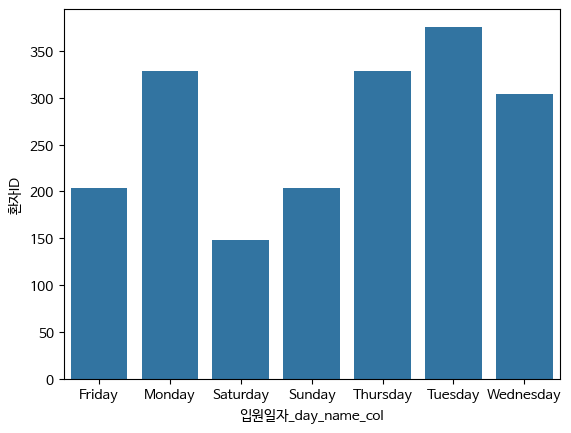

In [70]:
sns.barplot(data=df_SSL_extracts_in_pivot ,x='입원일자_day_name_col', y='환자ID')

<Axes: xlabel='퇴원일자_day_name_col', ylabel='환자ID'>

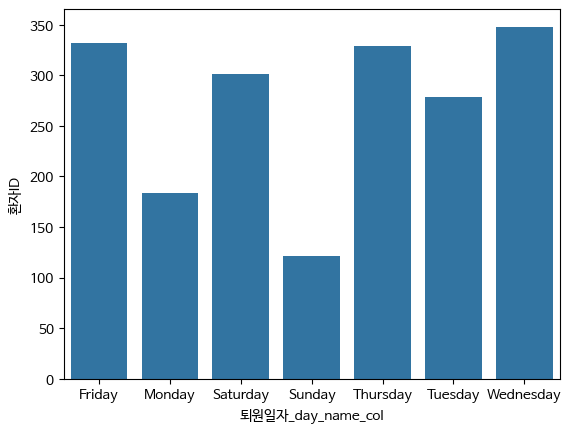

In [71]:
sns.barplot(data=df_SSL_extracts_out_pivot ,x='퇴원일자_day_name_col', y='환자ID')

<Axes: xlabel='입원일자_day_name', ylabel='count'>

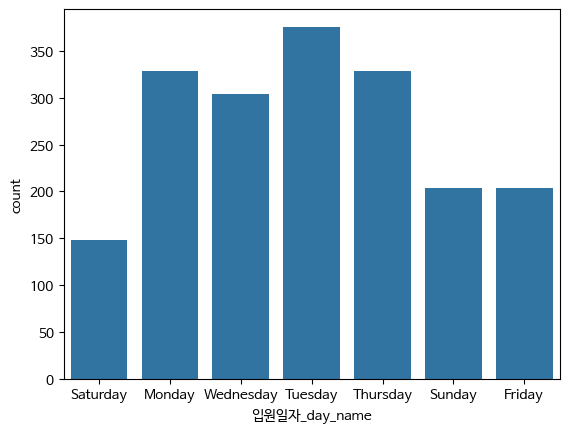

In [47]:
sns.countplot(data=df_SSL_extracts ,x='입원일자_day_name')